In [11]:
import pandas as pd

In [12]:
import pickle

df_train = pickle.load(open("train_pickle.pkl", "rb"))

In [14]:
df_test = pickle.load(open("test_pickle.pkl", "rb"))

In [ ]:
df_train.memory_usage(index=True).sum()/ 1024**2

In [ ]:
df_items = pd.read_csv("items.csv")
print(df_items.shape)
print(df_items.head())
# print(df_items.groupby("perishable").count())
# print(df_items.groupby("family").count())
# print(df_items.groupby("class").count())


In [ ]:
df_stores = pd.read_csv("stores.csv")

In [ ]:
df_train.loc[(df_train["item_nbr"] == 96995) & (df_train["store_nbr"] == 44)]

In [ ]:
# There are 54 stores - not that many, perhaps one-hot able? or simply handle as categorical
df_stores.shape

In [15]:
from catboost import CatBoostRegressor

In [16]:
model = CatBoostRegressor(
        depth=6, 
        l2_leaf_reg=3, 
        learning_rate=0.1,
        iterations=300,
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=1337)

In [17]:
df_train_mini = df_train.sample(frac=.1)

model.fit(
        df_train_mini.drop(['unit_sales'], axis=1), df_train_mini[["unit_sales"]],
        verbose = True)

Borders for float features generated
0:	learn 25.65644613	total: 3.31s	remaining: 16m 28s
1:	learn 25.39441525	total: 6.51s	remaining: 16m 10s
2:	learn 25.178733	total: 9.82s	remaining: 16m 12s
3:	learn 25.0041215	total: 13.3s	remaining: 16m 21s
4:	learn 24.86051157	total: 16.5s	remaining: 16m 13s
5:	learn 24.74345405	total: 19.7s	remaining: 16m 6s
6:	learn 24.64654029	total: 22.8s	remaining: 15m 55s
7:	learn 24.5658728	total: 26.2s	remaining: 15m 54s
8:	learn 24.50003148	total: 29.5s	remaining: 15m 53s
9:	learn 24.4459595	total: 32.8s	remaining: 15m 52s
10:	learn 24.39982898	total: 35.9s	remaining: 15m 42s
11:	learn 24.3634567	total: 39.2s	remaining: 15m 40s
12:	learn 24.33185183	total: 42.4s	remaining: 15m 36s
13:	learn 24.30795836	total: 45.7s	remaining: 15m 34s
14:	learn 24.28253208	total: 48.9s	remaining: 15m 28s
15:	learn 24.2645743	total: 51.9s	remaining: 15m 20s
16:	learn 24.25019738	total: 55.2s	remaining: 15m 18s
17:	learn 24.23829582	total: 58.6s	remaining: 15m 17s
18:	learn

151:	learn 24.00967272	total: 6m 21s	remaining: 6m 11s
152:	learn 24.00904933	total: 6m 23s	remaining: 6m 8s
153:	learn 24.00864525	total: 6m 26s	remaining: 6m 6s
154:	learn 24.00839541	total: 6m 28s	remaining: 6m 3s
155:	learn 24.00559471	total: 6m 30s	remaining: 6m
156:	learn 24.00522718	total: 6m 33s	remaining: 5m 58s
157:	learn 24.00418576	total: 6m 35s	remaining: 5m 55s
158:	learn 24.00326376	total: 6m 37s	remaining: 5m 52s
159:	learn 24.00277738	total: 6m 39s	remaining: 5m 49s
160:	learn 24.00178601	total: 6m 42s	remaining: 5m 47s
161:	learn 24.00089797	total: 6m 44s	remaining: 5m 44s
162:	learn 23.99998989	total: 6m 46s	remaining: 5m 41s
163:	learn 23.99917327	total: 6m 48s	remaining: 5m 39s
164:	learn 23.99853075	total: 6m 51s	remaining: 5m 36s
165:	learn 23.99793244	total: 6m 53s	remaining: 5m 33s
166:	learn 23.99745161	total: 6m 55s	remaining: 5m 31s
167:	learn 23.99717605	total: 6m 58s	remaining: 5m 28s
168:	learn 23.99634926	total: 7m	remaining: 5m 26s
169:	learn 23.9957074

In [18]:
result = model.predict(df_test)

In [6]:
sales = df_train.set_index(['Year', "Month", "Day"]).sort_index().groupby(level=[0,1,2])["unit_sales"].sum()

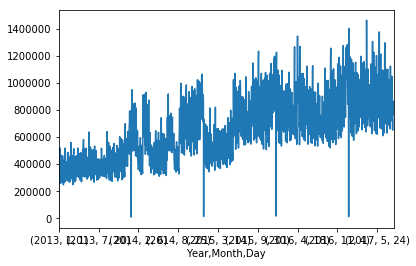

In [7]:
import matplotlib.pyplot as plt
sales.plot()
plt.show()

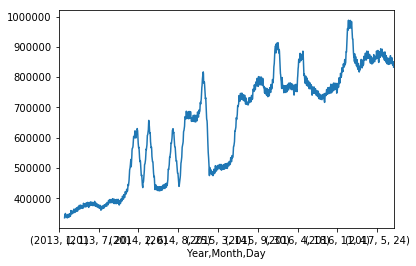

In [10]:
sales.rolling(window=30, center=False).mean().plot()
plt.show()